<a href="https://colab.research.google.com/github/onmax/bike-forecasting/blob/main/src/models/one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/onmax/bike-forecasting/
%cd bike-forecasting/src/models

In [2]:
!pip3 install tensorflow keras livelossplot tensorboard pandas >> /dev/null

In [9]:
%load_ext autoreload
%autoreload 2
%load_ext tensorboard

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [13]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

import os
import inspect
import sys

from window import WindowGenerator
from model_lib import compile_and_fit, get_metrics, model_generator

sys.path.insert(1, '../preprocessing/')
sys.path.insert(1, '../graphs/')
from dataset_lib import load_dataset, split_dataset
from lr import lr_timeline

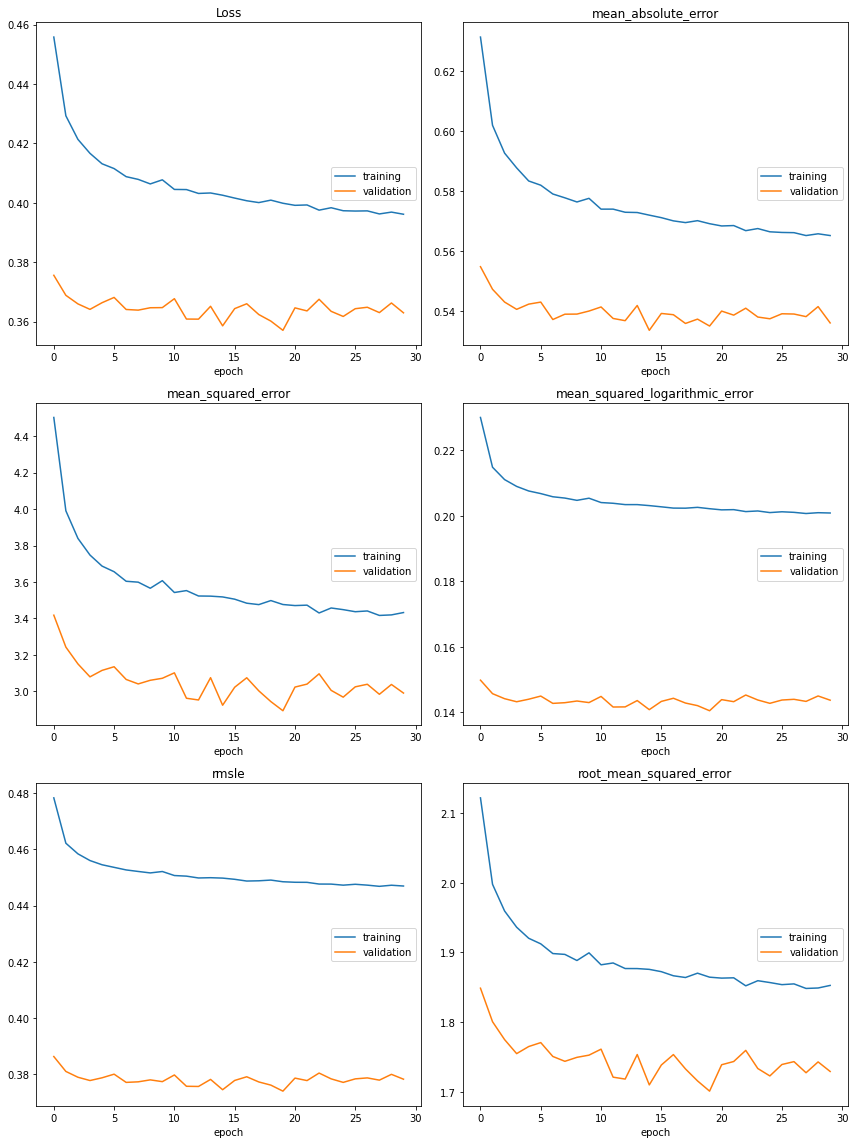

Loss
	training         	 (min:    0.396, max:    0.456, cur:    0.396)
	validation       	 (min:    0.357, max:    0.376, cur:    0.363)
mean_absolute_error
	training         	 (min:    0.565, max:    0.631, cur:    0.565)
	validation       	 (min:    0.534, max:    0.555, cur:    0.536)
mean_squared_error
	training         	 (min:    3.416, max:    4.503, cur:    3.432)
	validation       	 (min:    2.893, max:    3.418, cur:    2.990)
mean_squared_logarithmic_error
	training         	 (min:    0.201, max:    0.230, cur:    0.201)
	validation       	 (min:    0.140, max:    0.150, cur:    0.144)
rmsle
	training         	 (min:    0.447, max:    0.478, cur:    0.447)
	validation       	 (min:    0.374, max:    0.386, cur:    0.378)
root_mean_squared_error
	training         	 (min:    1.848, max:    2.122, cur:    1.853)
	validation       	 (min:    1.701, max:    1.849, cur:    1.729)
273/273 - 13s - loss: 0.3961 - mean_squared_logarithmic_error: 0.2008 - mean_squared_error: 3.4322 - me

In [40]:
model_generator("dense", lr=10e-3)

In [4]:
df = load_dataset()

Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-1
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-2
Putting together /mnt/f/proyectos/bikes/src/models/../../data/files/../parts/chicago-divvy-trips-part-3


In [5]:
train_df, val_df, test_df = split_dataset(df)

Training from 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Validating from 2018-01-01 00:00:00 to 2018-12-31 23:00:00
Testing from 2019-01-01 00:00:00 to 2019-12-31 23:00:00


In [64]:
input_width = 12
w1 = WindowGenerator(input_width=input_width, label_width=1, shift=1,
                        train_df=train_df, val_df=val_df, test_df=test_df)

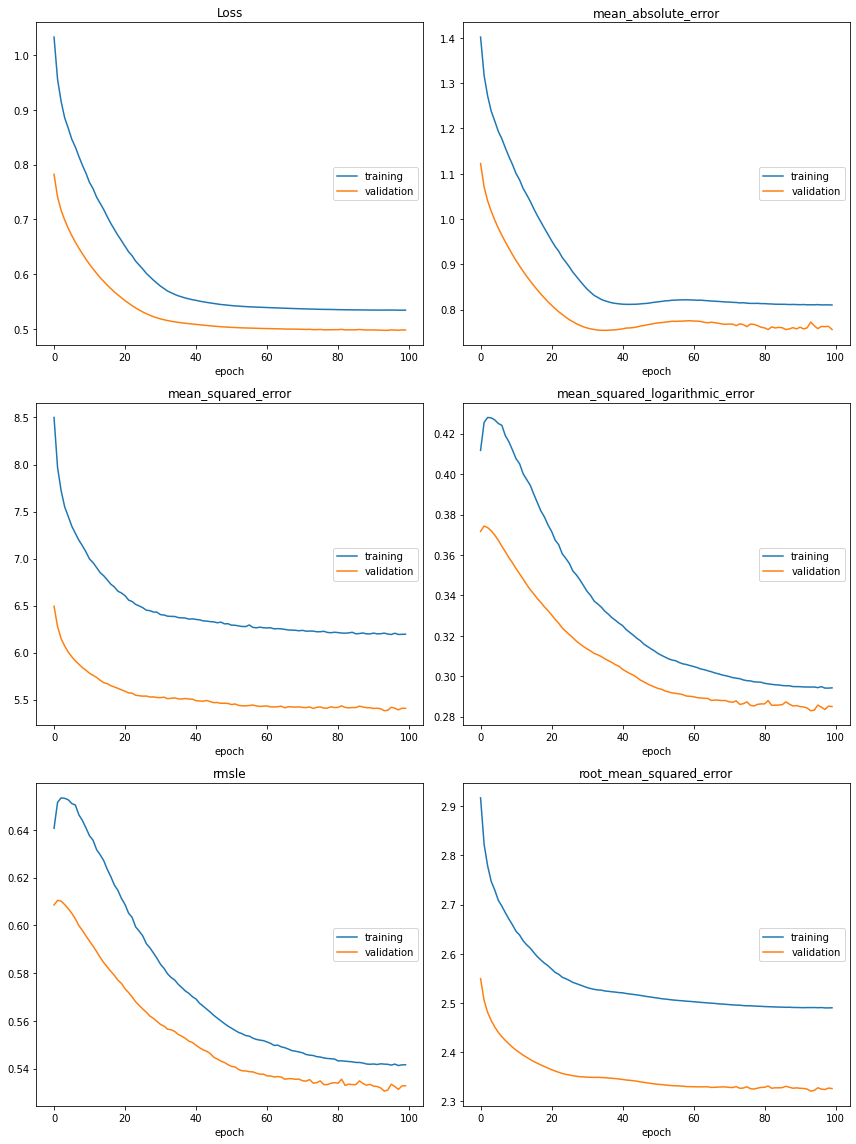

Loss
	training         	 (min:    0.534, max:    1.033, cur:    0.534)
	validation       	 (min:    0.497, max:    0.782, cur:    0.498)
mean_absolute_error
	training         	 (min:    0.810, max:    1.402, cur:    0.810)
	validation       	 (min:    0.754, max:    1.123, cur:    0.756)
mean_squared_error
	training         	 (min:    6.192, max:    8.500, cur:    6.196)
	validation       	 (min:    5.382, max:    6.493, cur:    5.408)
mean_squared_logarithmic_error
	training         	 (min:    0.294, max:    0.428, cur:    0.294)
	validation       	 (min:    0.283, max:    0.374, cur:    0.285)
rmsle
	training         	 (min:    0.541, max:    0.653, cur:    0.542)
	validation       	 (min:    0.531, max:    0.610, cur:    0.533)
root_mean_squared_error
	training         	 (min:    2.490, max:    2.917, cur:    2.490)
	validation       	 (min:    2.320, max:    2.549, cur:    2.326)
137/137 - 34s - loss: 0.5342 - mean_squared_logarithmic_error: 0.2943 - mean_squared_error: 6.1958 - me

In [15]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    Dense(32, activation="relu"),
    Dropout(0.3),fffffffffff
    Dense(32, activation="relu"),
    Dense(1),
])
history = compile_and_fit(model, w1, should_stop=True, max_epochs=100, lr_schedule_fn=(lambda epoch: 1e-6 * 10**(epoch/30)))

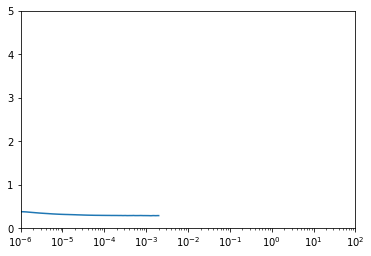

In [16]:
lr_timeline(history) 

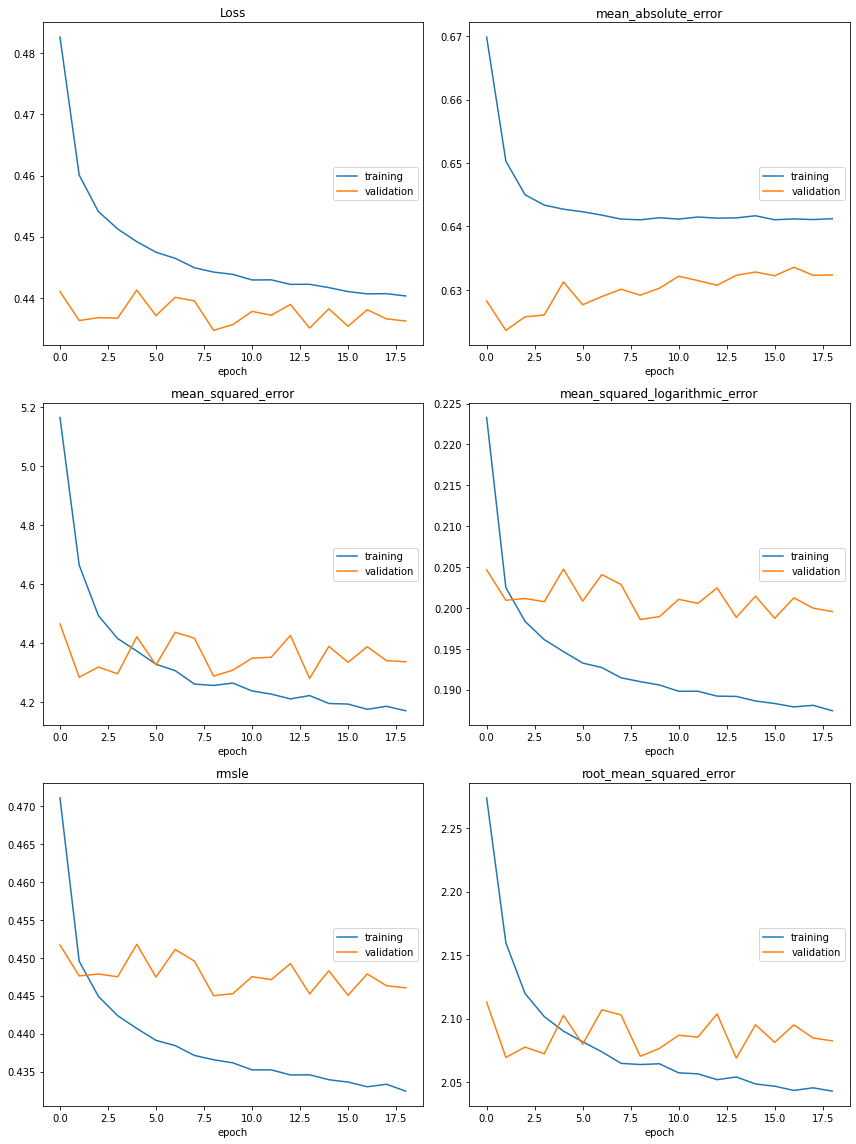

Loss
	training         	 (min:    0.440, max:    0.483, cur:    0.440)
	validation       	 (min:    0.435, max:    0.441, cur:    0.436)
mean_absolute_error
	training         	 (min:    0.641, max:    0.670, cur:    0.641)
	validation       	 (min:    0.624, max:    0.634, cur:    0.632)
mean_squared_error
	training         	 (min:    4.169, max:    5.166, cur:    4.169)
	validation       	 (min:    4.279, max:    4.464, cur:    4.336)
mean_squared_logarithmic_error
	training         	 (min:    0.187, max:    0.223, cur:    0.187)
	validation       	 (min:    0.199, max:    0.205, cur:    0.200)
rmsle
	training         	 (min:    0.432, max:    0.471, cur:    0.432)
	validation       	 (min:    0.445, max:    0.452, cur:    0.446)
root_mean_squared_error
	training         	 (min:    2.043, max:    2.274, cur:    2.043)
	validation       	 (min:    2.069, max:    2.113, cur:    2.082)
137/137 - 21s - loss: 0.4403 - mean_squared_logarithmic_error: 0.1874 - mean_squared_error: 4.1694 - me

In [72]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(633, activation="relu"),
])
history = compile_and_fit(model, w1, lr=10e-3, should_stop=True, max_epochs=100, tensorboard=True)

In [73]:
metrics = get_metrics(model, w1)
metrics

137/137 [==============================] - 7s 49ms/step - loss: 0.4704 - mean_squared_logarithmic_error: 0.2167 - mean_squared_error: 4.6005 - mean_absolute_error: 0.6721 - root_mean_squared_error: 2.1451 - rmsle: 0.4648


,names,train,val,test
0,huber,0.440081,0.436206,0.470434
1,mean_squared_logarithmic_error,0.185520,0.199405,0.216741
2,mean_squared_error,4.246865,4.331558,4.600506
3,mean_absolute_error,0.637874,0.632355,0.672115
4,root_mean_squared_error,2.060670,2.082389,2.145121
5,rmsle,0.430235,0.445831,0.464847
